<a href="https://colab.research.google.com/github/MatchLab-Imperial/deep-learning-course/blob/master/week05_RNN_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this tutorial, we will see how to implement in Keras different topologies of RNNs architectures such as One to Many, Many to One and Many to Many, exploring many practical applications ranging from image captioning to sentiment analysis and machine translation.


![alt text](https://drive.google.com/uc?id=1fANRkPIIbCjhSyo6gnLKrfpcbLxQYLm6)

**One to One Vanilla Recurrent Neural Network.**

This is the most simple version of RNNs, which can be easily derived from a simple feedforward architecture by adding a single loop as in the illustration below. During the training, the hidden state $h$ is iteratively updated based on the input value $x$ and learned weights $W_h$ and, finally, the output $y$ is estimated from the current state $h_t$ and the matrix s $W_y$. The weights matrices $W_h$ and  $W_y$ are trained end-to-end with backpropagation.
![alt text](https://drive.google.com/uc?id=1oFOm5S6czs3vymPMMcRTFtAmJu0nFpJE)



Unfortunately, RNN suffers from the vanishing gradient problem, that means the hidden state is updated again and again and the final value may overflow resulting in NaN values. To overcome this limitation, in practical applications LSTM unit is adopted, that is a special RNNs architecture composed of a cell, an input gate, an output gate and a forget gate. There are many articles online and official papers, explaining how LSTM in particular works. In this tutorial, we will use it straight away as a  black box.

# **One-to-One RNNs - Regression**
This is a toy example explaining how to implement a simple RNNs model in Keras. Given a record of a local newspaper, indicating for each month the number of new subscriptions, we want to predict the number of members will joint next month. In this example, we assume that at each time the number of members depends on the number of members who joined the previous month. 

First, we load the data with the utility method in Pandas "read_csv", which allows the operation directly from the data URL. In addition, we visualize some rows of the imported record too see the format of the data.


In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import io
import requests
data=pd.read_csv("https://drive.google.com/uc?id=1Hv2nuwVXO_aZN89llGva0hSH6k3kKAVm",usecols=[1],engine = "python")
data.head()

,Number of subscriptions to city newspaper
0,112
1,118
2,132
3,129
4,121


For a best understanding of the data,  we plot the data as a graph with matplolib routines.


---





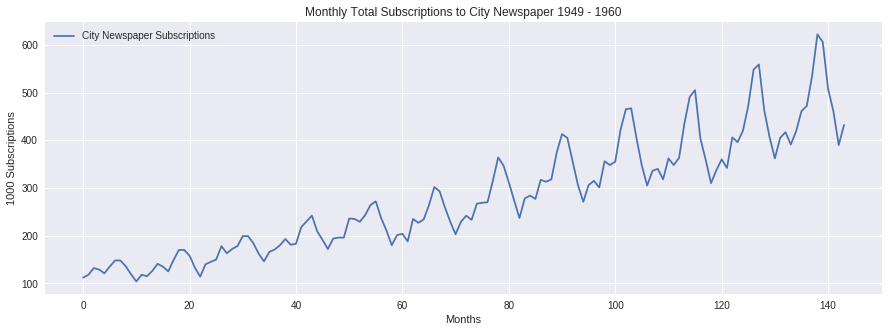

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(data, label = "City Newspaper Subscriptions")
plt.xlabel("Months")
plt.ylabel("1000 Subscriptions")
plt.title("Monthly Total Subscriptions to City Newspaper 1949 - 1960")
plt.legend()
plt.show()

Let's move to the model definition in Keras. First, we import the required modules.

In [0]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

Data preprocessing is an essential step in data analysis to normalize input data. Specifically, we will scale input data with min-max normalization. 


In [0]:
# convert pandas data frame in numpy array of float.
data_np = data.values.astype("float32")

# normalize data with min max normalization
normalizer = MinMaxScaler(feature_range = (0, 1))
dataset = normalizer.fit_transform(data_np)


Next, we split the dataset in training and test to evaluate the effectiveness of the model. Specifically, we use  70%  of the data as a training set, and  30%  of the data as a test set.

In [0]:
# Using 70% of data for training, 30% for validation.
TRAINING_PERC = 0.70

train_size = int(len(dataset) * TRAINING_PERC)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of samples training set: " + str((len(train))))
print("Number of samples test set: " + str((len(test))))

Number of samples training set: 100
Number of samples test set: 44


We also arrange the dataset in the appropriate format for Keras, with the helper function create_dataset.

In [0]:
# helper function to read data.
def create_dataset(dataset, window_size = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        sample = dataset[i:(i + window_size), 0]
        data_x.append(sample)
        data_y.append(dataset[i + window_size, 0])
    return(np.array(data_x), np.array(data_y))


In [0]:
# Create test and training sets for regression with window size 1.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

Once all the data are ready, we create the model as a `Sequential` object including 5 LSTM units and a dense layer outputing a single scalar.
We specify a window size equals to 1, so that the prediction of the current element depends only on the previuos one.
Finally, we train our vanilla RNNs model, plotting the training loss for each epoch.

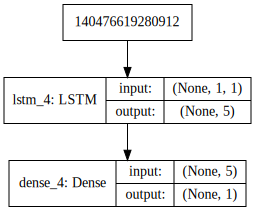

In [0]:
def create_model(train_X, train_Y, window_size = 1):
    vanilla_rnn = Sequential()
    
    vanilla_rnn.add(LSTM(5,input_shape = (1, window_size)))
    vanilla_rnn.add(Dense(1))
    vanilla_rnn.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    
    return(vanilla_rnn)

vanilla_rnn = create_model(train_X, train_Y, window_size)
SVG(model_to_dot(vanilla_rnn, show_shapes=True).create(prog='dot', format='svg'))


In [0]:
vanilla_rnn.fit(train_X, train_Y, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
 - 1s - loss: 0.0563
Epoch 2/100
 - 0s - loss: 0.0266
Epoch 3/100
 - 0s - loss: 0.0194
Epoch 4/100
 - 0s - loss: 0.0176
Epoch 5/100
 - 0s - loss: 0.0165
Epoch 6/100
 - 0s - loss: 0.0155
Epoch 7/100
 - 0s - loss: 0.0142
Epoch 8/100
 - 0s - loss: 0.0133
Epoch 9/100
 - 0s - loss: 0.0120
Epoch 10/100
 - 0s - loss: 0.0110
Epoch 11/100
 - 0s - loss: 0.0099
Epoch 12/100
 - 0s - loss: 0.0089
Epoch 13/100
 - 0s - loss: 0.0078
Epoch 14/100
 - 0s - loss: 0.0068
Epoch 15/100
 - 0s - loss: 0.0059
Epoch 16/100
 - 0s - loss: 0.0052
Epoch 17/100
 - 0s - loss: 0.0044
Epoch 18/100
 - 0s - loss: 0.0038
Epoch 19/100
 - 0s - loss: 0.0034
Epoch 20/100
 - 0s - loss: 0.0030
Epoch 21/100
 - 0s - loss: 0.0027
Epoch 22/100
 - 0s - loss: 0.0026
Epoch 23/100
 - 0s - loss: 0.0024
Epoch 24/100
 - 0s - loss: 0.0023
Epoch 25/100
 - 0s - loss: 0.0022
Epoch 26/100
 - 0s - loss: 0.0023
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0022
Epoch 30/100
 - 0s - lo

Once the Vanilla RNNs model is trained,  please make sure it generalizes well also on the test data. One way to do it is checking the mean square error.

In [0]:
def get_predict_and_score(model, X, Y):
    # transform the prediction to the original scale.
    pred = normalizer.inverse_transform(model.predict(X))
    # transform also the label to the original scale for interpretability.
    orig_data =normalizer.inverse_transform([Y])
    # calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

mse_train, train_predict = get_predict_and_score(vanilla_rnn, train_X, train_Y)
mse_test, test_predict = get_predict_and_score(vanilla_rnn, test_X, test_Y)

print("Training data error: %.2f MSE" % mse_train)
print("Test data error: %.2f MSE" % mse_test)

Training data error: 23.71 MSE
Test data error: 49.89 MSE


Another straightforward way is plotting the predictions and the true values as a graph and see how they are close spatially.

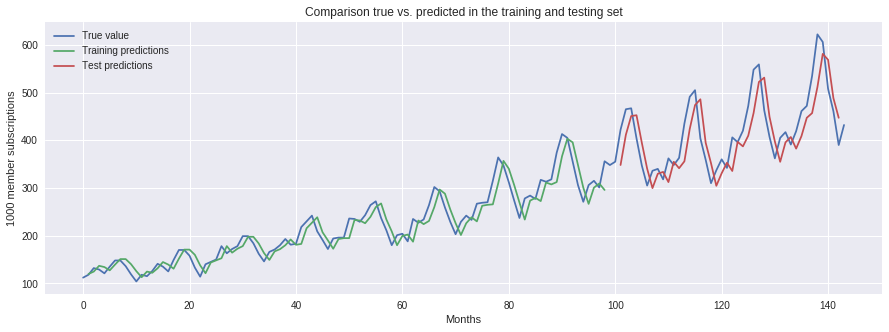

In [0]:
# Training predictions.
train_predictions = np.empty_like(dataset)
train_predictions[:, :] = np.nan
train_predictions[window_size:len(train_predict) + window_size, :] = train_predict

# Test predictions.
test_predictions = np.empty_like(dataset)
test_predictions[:, :] = np.nan
test_predictions[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(normalizer.inverse_transform(dataset), label = "True value")
plt.plot(train_predictions, label = "Training predictions")
plt.plot(test_predictions, label = "Test predictions")
plt.xlabel("Months")
plt.ylabel("1000 member subscriptions")
plt.title("Comparison true vs. predicted in the training and testing set")
plt.legend()
plt.show()


# Many to One - Sentimental Analysis

Many to one model take as input multiple data,  such as text, video frames and give as output a single value. This topology can be used for classifying texts, for example, based on the emotions it can evoke to the reader. The task it is called sentimental analysis.

As usual we start importing all the needed modules.

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, CuDNNLSTM
from keras.layers import Dense, Embedding, Dropout
from keras.datasets import imdb

from keras import __version__
from distutils.version import LooseVersion as LV
from keras import backend as K

from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



Next, we load the IMDB data set, containing 50000 movies reviews from the Internet Movie Database. Totally there are 25000 reviews for training and 25000 reviews for testing, half positive and half negative.  Each review is represented as a sequence of integers and is labeled with 1 and 0. In this particular example, we do not need to normalize the dataset, as it has been already preprocessed. 

In [0]:
# Max number of words to include. Words are ranked by how often they occur (in the training set) and only the most frequent words are kept
n_words = 10000
# Max lenght of a text
maxlen = 80

print('Loading data...')
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=n_words)
print('Number of training reviews:', X_train.shape)
print('Number of testing reviews:', X_test.shape)

# In case a review doesn't reach the maximum lenght, it needs to be zero padded.
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)


Loading data...
('Number of training reviews:', (25000,))
('Number of testing reviews:', (25000,))


In [0]:
print("Example of review in the training set:\n", X_train[0], "length:", len(X_train[0]), "class:", Y_train[0])

('Example of review in the training set:\n', [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32], 'length:', 218

It is time to implement a many to one RNNs model. We will use two LSTM layers.  Bore in mind, to stack multiple RNN layers, all RNN layers except the last one need to have "return_sequences=True". The output layer contains a single neuron and sigmoid non-linearity to match the binary labels. At the moment, we omit the description of the embedding layer, which will be clarified in the second part of the tutorial, focusing on text/speech processing. Next, we compile() the model, using binary cross-entropy as loss function and RMSprop as optimizer.


In [0]:
# model parameters:
embedding_dims = 50
lstm_units = 32

print('Build model...')
model = Sequential()

model.add(Embedding(n_words,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

model.add(LSTM(lstm_units, return_sequences=True))
model.add(LSTM(lstm_units, return_sequences=True))
model.add(LSTM(lstm_units))

model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Build model...


SVG method it is an utility for visualizing network representation.

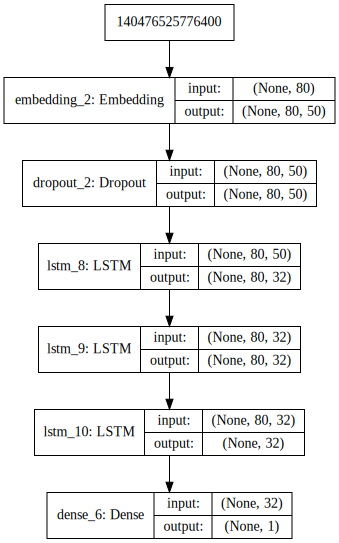

In [0]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Now we are ready to train the model:

In [0]:
%%time
epochs = 5
validation_split = 0.2

history = model.fit(X_train, Y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 39s 2ms/step - loss: 0.4910 - acc: 0.7584 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 2/5
20000/20000 [==============================] - 36s 2ms/step - loss: 0.3306 - acc: 0.8602 - val_loss: 0.3877 - val_acc: 0.8328
Epoch 3/5
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2820 - acc: 0.8871 - val_loss: 0.4219 - val_acc: 0.8346
Epoch 4/5
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2490 - acc: 0.9022 - val_loss: 0.3633 - val_acc: 0.8404
Epoch 5/5
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2244 - acc: 0.9134 - val_loss: 0.4051 - val_acc: 0.8332
CPU times: user 5min 28s, sys: 17.4 s, total: 5min 45s
Wall time: 3min 6s


Finally, we visualise the training and validation error and check the accuracy.

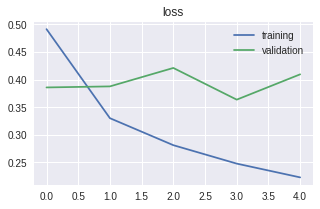

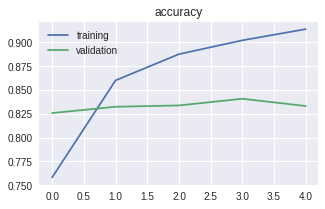

In [0]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'], label='training')
plt.plot(history.epoch,history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best');

In [0]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 82.88%



# **One to Many - Image Captioning**
This model takes as input a single element and gives as output multiple elements. For example, it can be used for image captioning. The task consist in describing with a text the content of an image.

First, we import all the needed modules and re-arrange the input data as required for Keras methods. In particular, in this example, we import MNIST dataset and adapt the task of image captioning on it.

In [0]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.layers.core import RepeatVector
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from IPython.display import SVG


In [0]:
n_classes = 10
batch_size = 128
epochs = 20

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

vocab_size = 26



(60000, 'train samples')
(10000, 'test samples')


The next two lines of codes are useful to adapt the dataset for our goal. It converts each label to a binary vector representing the caption.

In [0]:

y_train = np.reshape(np.tile(y_train, (vocab_size,)), (-1, 10, vocab_size))
y_test = np.reshape(np.tile(y_test, (vocab_size,)), (-1, 10, vocab_size))


The trick here to implement One to Many RNNs architecture is using the TimeDistributed wrapper. It applies a dense layer to each inner state in order to produce multiple outputs, representing the final caption.

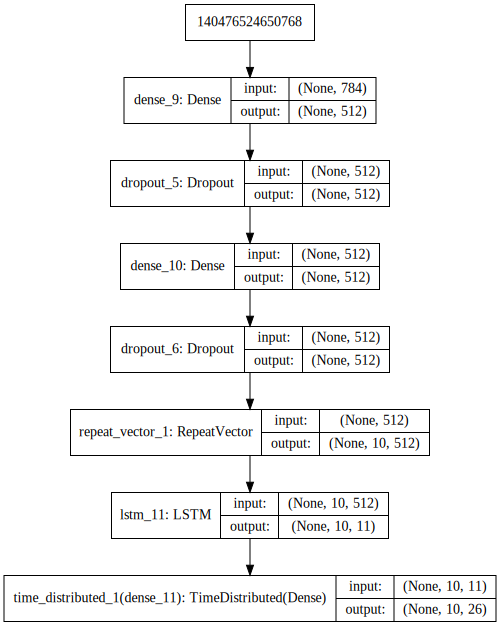

In [0]:

one_to_many = Sequential()
one_to_many.add(Dense(512, activation='relu', input_shape=(784,)))
one_to_many.add(Dropout(0.2))
one_to_many.add(Dense(512, activation='relu'))
one_to_many.add(Dropout(0.2))
one_to_many.add(RepeatVector(10))
one_to_many.add(LSTM(11, return_sequences=True))
one_to_many.add(TimeDistributed(Dense(vocab_size, activation='softmax')))


one_to_many.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
SVG(model_to_dot(one_to_many, show_shapes=True).create(prog='dot', format='svg'))

Finally, we perform the training and the caption prediction.

In [0]:
history = one_to_many.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_test, y_test))
pred = one_to_many.predict(X_test)
print(pred)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 442us/step - loss: 7.0852 - acc: 0.0743 - val_loss: 6.7973 - val_acc: 0.0920
Epoch 2/20
60000/60000 [==============================] - 24s 408us/step - loss: 6.6633 - acc: 0.1140 - val_loss: 6.4426 - val_acc: 0.1667
Epoch 3/20
60000/60000 [==============================] - 25s 414us/step - loss: 5.3559 - acc: 0.2683 - val_loss: 4.1423 - val_acc: 0.4066
Epoch 4/20
60000/60000 [==============================] - 25s 419us/step - loss: 3.6145 - acc: 0.3842 - val_loss: 3.2082 - val_acc: 0.3946
Epoch 5/20
60000/60000 [==============================] - 25s 413us/step - loss: 3.1670 - acc: 0.3686 - val_loss: 3.0726 - val_acc: 0.3653
Epoch 6/20
60000/60000 [==============================] - 25s 416us/step - loss: 3.0046 - acc: 0.3687 - val_loss: 2.9559 - val_acc: 0.3601
Epoch 7/20
60000/60000 [==============================] - 25s 420us/step - loss: 2.9033 - acc: 0.3741 - val_loss: 2.